# Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
# from tensorflow import keras
import random
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from PreProcessing import pickle_To_Image, setGrayAndNormalise
from PIL import Image
import pickle

# Libraries for model creation
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
# from keras.utils import to_categorical
# from keras.optimizers import Adam, SGD, Adagrad

# Scikit Learn Libraries
from sklearn.model_selection import RandomizedSearchCV

# Classification Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix

In [ ]:
import numpy as np                                                   # for numerical operations on arrays and matrices
import pandas as pd                                                  # for data manipulation and analysis
import seaborn as sns                                                # for data visualization
import matplotlib.pyplot as plt                                      # for creating static visualizations
import plotly.express as px                                          # for creating interactive visualizations
import tensorflow as tf                                              # for building and training deep learning models
import random                                                        # for generating random numbers 
import cv2                                                           # for computer vision tasks like image processing
import pickle                                                        # for serializing and deserializing data
import pickle
from tensorflow import keras                                         # for building and training deep learning models
from tensorflow.keras.preprocessing.image 
import ImageDataGenerator, i
mg_to_array, array_to_img, load_img                                   # for preprocessing images
from PreProcessing import pickle_To_Image, setGrayAndNormalise        # custom functions for preprocessing images
from PIL import Image                                                 # for image processing and manipulation

from keras.models import Sequential                                   # for building a sequential model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout   # for adding layers to a model
from keras.utils import to_categorical                                # for one-hot encoding categorical variables
from keras.optimizers import Adam, SGD, Adagrad                       # for specifying optimization algorithm

from sklearn.model_selection import RandomizedSearchCV                # for hyperparameter tuning
import keras_tuner                                                    # for hyperameter tuning of deeping learning models

from sklearn.metrics import accuracy_score, precision_score, 
recall_score, f1_score, cohen_kappa_score, 
roc_auc_score, confusion_matrix                                       # for evaluating model performance using various metrics


# GPU Setup

In [308]:
print("Num of GPUs available: ", len(tf.test.gpu_device_name()))


Num of GPUs available:  13


In [8]:
# checks to see if GPU is present
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [ ]:
!pip install tensorflow-gpu


In [309]:
print(tf.__version__)

1.12.0


In [310]:
import sys
sys.version

'3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]'

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

In [312]:
# check status of NVIDIA GPU on the system
!nvidia-smi

Mon Mar 13 00:05:54 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.94       Driver Version: 516.94       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:09:00.0  On |                  N/A |
| 35%   42C    P8    10W / 100W |   3791MiB /  4096MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
tf.config.list_physical_devices('GPU')

AttributeError: module 'tensorflow' has no attribute 'config'

# Importing train data

In [10]:
import os

# Declare training path 
path = '/Dataset/gtsrb-dataset'
train_path='./gtsrb-dataset/Train'

# Declare image size to be resized when loaded
Image_Height = 32
Image_width = 32

# Display number of classes found in train path
classes = len(os.listdir(train_path))
print("Number of classes:", classes)



Number of classes: 43


In [10]:
# Using defined path to extract images and labels into a numpy array

# Declare arrays to store train images and labels
IMG_DATA = []
labels = []

# for each class, append class number with train path
for i in range(classes):
    i_path = os.path.join(train_path, str(i)) #0-42
    # for each image in the subdirectory
    # Open image using PIL, resize image to 32x32
    # append corresponding labels
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((Image_Height,Image_width))
        im = np.array(im)
        IMG_DATA.append(im)
        labels.append(i)
# Convert to an array
IMG_DATA_ARR = np.array(IMG_DATA)
labels = np.array(labels)

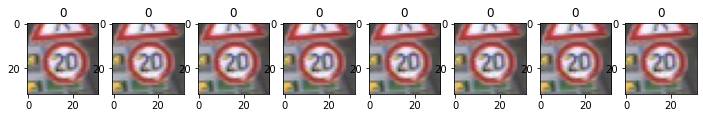

In [11]:
# Display random images from array
plt.figure(figsize = (12,12))

for i in range(8) :
    plt.subplot(1, 8, i+1)
    plt.imshow(IMG_DATA_ARR[4], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[4])

plt.show()

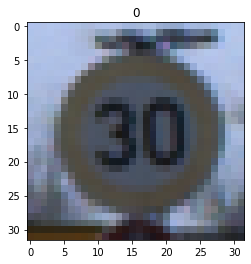

In [12]:
plt.imshow(IMG_DATA_ARR[2300], cmap='gray')
plt.title(labels[4])
plt.show()

In [72]:
len(IMG_DATA_ARR)
len(labels)

39209

In [73]:
IMG_DATA_ARR.shape
labels.shape

(39209,)

## Create dictionary for traffic sign labels

In [62]:
CLASS_LABELS = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

# Exploratory data analysis

Text(0.5, 1.0, 'histogram before data preprocessing')

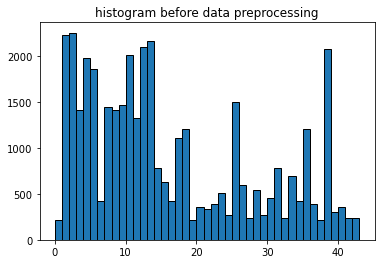

In [17]:
# Visualisation of the training data
images_per_class, bins, _ = plt.hist(labels,bins=range(classes+1),edgecolor = "black")
plt.title('histogram before data preprocessing')

In [ ]:
BEGIN
num_images_per_track = 30
PRINT "number of classes: ", classes
unique_classes, class_counts = np.unique(labels, return_counts='True')
num_tracks = (class_counts / num_images_per_track).astype(int)
PRINT "number of tracks for a class: ", num_tracks

num_images_per_class = np.zeros(len(unique_classes), dtype='int')
FOR i = 1 TO len(unique_classes) - 1
num_images_per_class[i:] += class_counts[i-1]
ENDFOR
PRINT "number of images in a class: ", num_images_per_class

validation_indices = []
FOR i = 0 TO len(unique_classes) - 1
track_val = randomly select 2 values from range(num_tracks[i])
FOR j in track_val
start = num_images_per_class[i] + num_images_per_track * j
end = start + num_images_per_track
validation_indices = concatenate (validation_indices, array from start to end)
PRINT "class: ", i, "tracks picked: ", track_val, "start: ", start, "end: ", end
ENDFOR
ENDFOR

validation_x = take(IMG_DATA_ARR, validation_indices, axis=0)
validation_y = take(labels, validation_indices, axis=0)

train_x = take(IMG_DATA_ARR, sorted(set(range(len(IMG_DATA_ARR))) - set(validation_indices)), axis=0)
train_y = take(labels, sorted(set(range(len(labels))) - set(validation_indices)), axis=0)
END

# Creating Validation Dataset

The GTSRB dataset contains 30 samples of that same traffic sign taken for a 1-second video called a track. The samples within a track closely related and when splitting off a validation dataset from the training dataset, it is important to split off complete tracks. 
If samples from the same track were spread across both the training and validation datasets, the validation dataset would no longer be a meaningful indicator of how well the model performs on unseen data.

In [79]:
# Create a dataset that contains images from tracks different to training set

# initialise number of images in each track
num_images_per_track = 30
# get number of classes
print("number of classes: ",classes)

# get number of samples in each class
unique_classes, class_counts = np.unique(labels, return_counts='True')

# number of tracks for a given class
num_tracks = (class_counts / num_images_per_track).astype(int)

print("number of tracks for a class: ", num_tracks)

# calculate array of number of images in a class
num_images_per_class = np.zeros(len(unique_classes),dtype='int') # initialise an empty array with zero values

for i in range(1, len(unique_classes)):
    num_images_per_class[i:] += class_counts[i-1]

print("number of tracks for a class: ", num_images_per_class)

# declare validation indices array
validation_indices = np.array([], dtype=int)

# for each class randomly select  a track value
for i in range (len(unique_classes)):
    track_val = random.sample(range(num_tracks[i]), 2)
# for each track value get start and end indices
    for j in track_val:
        start = num_images_per_class[i] + num_images_per_track * j
        end = start + num_images_per_track
        validation_indices = np.hstack((validation_indices, np.r_[start:end]))
        print("class: ", i, "tracks picked: ", track_val, "start: ", start, "end: ", end)

# create new validation dataset
validation_x = np.take(IMG_DATA_ARR, validation_indices,0)
validation_y = np.take(labels, validation_indices,0)

#create new train set without data from validation dataset
train_x = np.take(IMG_DATA_ARR, sorted(set(range(len(IMG_DATA_ARR)))-set(validation_indices)), 0)
train_y = np.take(labels,sorted(set(range(len(labels)))-set(validation_indices)), 0 )

# save datasets as pickle file
with open('val_split_x.pkl','wb') as f:
    pickle.dump(validation_x, f)
with open('val_split_y.pkl','wb') as f:
    pickle.dump(validation_y, f)

with open('train_split_x.pkl','wb') as f:
    pickle.dump(train_x, f)
with open('train_split_y.pkl','wb') as f:
    pickle.dump(train_y, f)


print("Training and Validation dataset saved")

# Code below is adapted from Pierluigi Ferrari, https://github.com/pierluigiferrari/traffic_sign_classifier/blob/master/traffic_sign_classifier.ipynb
# (accessed 27 December 2022)

number of classes:  43
number of tracks for a class:  [ 7 74 75 47 66 62 14 48 47 49 67 44 70 72 26 21 14 37 40  7 12 11 13 17
  9 50 20  8 18  9 15 26  8 22 14 40 13  7 69 10 12  8  8]
number of tracks for a class:  [    0   210  2430  4680  6090  8070  9930 10350 11790 13200 14670 16680
 18000 20100 22260 23040 23670 24090 25200 26400 26610 26970 27300 27690
 28200 28470 29970 30570 30810 31350 31620 32070 32850 33090 33779 34199
 35399 35789 35999 38069 38369 38729 38969]
class:  0 tracks picked:  [3, 1] start:  90 end:  120
class:  0 tracks picked:  [3, 1] start:  30 end:  60
class:  1 tracks picked:  [6, 16] start:  390 end:  420
class:  1 tracks picked:  [6, 16] start:  690 end:  720
class:  2 tracks picked:  [46, 74] start:  3810 end:  3840
class:  2 tracks picked:  [46, 74] start:  4650 end:  4680
class:  3 tracks picked:  [3, 33] start:  4770 end:  4800
class:  3 tracks picked:  [3, 33] start:  5670 end:  5700
class:  4 tracks picked:  [42, 57] start:  7350 end:  7380
class:  

Training and Validation dataset saved


In [93]:
# print training and validation dataset info
validation_unique = np.unique(validation_y, return_counts='False')
num_classes_val = len(validation_unique)

# Print training and validatio samples
print("Number of training examples =", len(train_x))
print("Number of validation examples =", len(validation_x))
print("Image data shape =", train_x.shape)
print("Number of classes in the training set =", len(unique_classes))
# print("Number of classes in the validation set =", num_classes_val)

Number of training examples = 36629
Number of validation examples = 2580
Image data shape = (36629, 32, 32, 3)
Number of classes in the training set = 43


## Import pickled datasets

In [22]:
import pickle
# Import pickle datasets
with open('train_split_x.pkl','rb') as f:
    train_x = pickle.load(f)
with open('train_split_y.pkl','rb') as f:
    train_y = pickle.load(f)
    
with open('val_split_x.pkl','rb') as f:
    val_x = pickle.load(f)
with open('val_split_y.pkl','rb') as f:
    val_y = pickle.load(f)

## Export and Import dataset functions

In [137]:
def imageToPickle(X_Set, name_X):                 
    with open(name_X,'wb') as f:
        pickle.dump(X_Set, f)
    print("dataset has been saved as pickle file :)")
    
def pickleToImage(name_X):
    with open(name_X,'rb') as f:
        X_Set = pickle.load(f)
    print("dataset has been imported :)")
    return X_Set

# Grayscale and Normalise images

In [34]:
# Turning images to grayscale and using histrogram equalization
# Both BGR2GRAY and RGB2GRAY are supported
# It is dependant on the input image format
import cv2

# Convert to Grayscale using BGR2GRAY
# 24-bit format with B0 G0 R0 B1 G1 R1 layout
def setGrayAndNormalise(img):
  img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  equ  = cv2.equalizeHist(img_gray)
  norm = equ/255  
  return norm

train_x_processed = np.array([setGrayAndNormalise(img) for img in train_x])
val_x_processed = np.array([setGrayAndNormalise(img) for img in val_x])

Type of image:  float64
Pixels values of image:  [[0.0627451  0.03921569 0.12941176 ... 0.01568627 0.         0.        ]
 [0.1372549  0.09803922 0.14901961 ... 0.05098039 0.0627451  0.08627451]
 [0.08627451 0.1372549  0.17254902 ... 0.02745098 0.03137255 0.0745098 ]
 ...
 [0.62745098 0.57647059 0.51764706 ... 0.28627451 0.3372549  0.35686275]
 [0.23529412 0.28627451 0.1372549  ... 0.38039216 0.45098039 0.34509804]
 [0.14901961 0.3372549  0.0627451  ... 0.37254902 0.32156863 0.2627451 ]]
Type of image:  float64
Min and Max value of image:  0.0 1.0


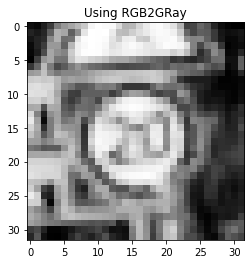

In [134]:
# Turning images to rgb2gray grayscale and using histogram equalization

# Convert to Grayscale using RGB2GRAY
# 24-bit format with R0 G0 B0 R1 B1 G1 layout
def setGrayAndNormalise(img):
  img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  equ  = cv2.equalizeHist(img_gray)
  norm = equ/255  
  return norm

# Pass each image in the set into the function
train_x_processed_rgb2gray = np.array([setGrayAndNormalise(img) for img in train_x])

# Display image info
plt.imshow(train_x_processed_rgb2gray[0], cmap='gray')
plt.title('Using RGB2GRay')

print("Pixels values of image: " ,train_x_processed_rgb2gray[0])

print("Type of image: " ,train_x_processed_rgb2gray[0].dtype)

print("Min and Max value of image: ", train_x_processed_rgb2gray.min(), train_x_processed_rgb2gray.max())

In [139]:
# Pickle processed images
imageToPickle(train_x_processed_rgb2gray,'trainX_rgb2gray_equ_norm.pkl')

dataset has been saved as pickle file :)


In [140]:
# Pickle processed images
imageToPickle(train_x_processed,'trainX_bgr2gray_equ_norm.pkl')

dataset has been saved as pickle file :)


Text(0.5, 1.0, 'after')

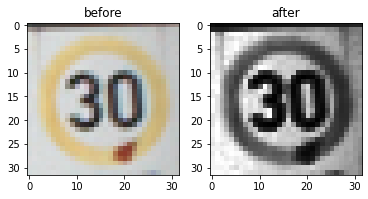

In [116]:
# Plot graph to show before and after of image processing
plt.figure
plt.subplot(1,2,1)
plt.imshow(train_x[2300])
plt.title('before')

plt.subplot(1,2,2)
plt.imshow(train_x_processed[2300], cmap='gray')
plt.title('after')

## Building Model Architecture

In [36]:
train_x_processed.shape
train_x.shape

(36629, 32, 32, 3)

In [38]:
# declare a sequential model object to build layers
model = Sequential()

# 1st Cov layer with an output shape of 28x28x16, ReLu activation function for more robust feature map
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(32,32,3)))
# Max pooling layer with a size of 2x2 to resulting in a smaller, more informative feature map
model.add(MaxPool2D(pool_size=(2,2)))
# Regularisation set to 0.25 that sets 25% if input set randomly to zero during each training cycle
model.add(Dropout(rate=0.25))

# 2nd Cov layer with an ouput shape of 26x26x32, ReLu activation function for more robust feature map. 
# Kernel size reduced to 3x3
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
# Max pooling layer with a size of 2x2 to resulting in a smaller, more informative feature map
model.add(MaxPool2D(pool_size=(2,2)))
# Regularisation set to 0.25 that sets 25% if input set randomly to zero during each training cycle
model.add(Dropout(rate=0.25))

# Converts 3D tensor output into a 1D tensor to be fed inti the fully connected layer
model.add(Flatten())
# Final layer that connects previous neurons together,
# Softmax activation function transforms output scores into a probability distribution of predicted classes
model.add(Dense(43, activation='softmax'))

# Display summary of all layers combined
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 16)        1216      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)              0         
__________

# Training

## Training with RGB images

In [39]:
from keras.optimizers import Adam

# Declare training parameters
learning_rate = 0.001
epoch = 10
batch_size =32

# Compile model 
model.compile(loss='categorical_crossentropy',optimizer='adam',  metrics=['accuracy'])

In [40]:
from keras.utils import to_categorical

# one hot encode train and validation labels
y_train = to_categorical(train_y, 43)
y_val = to_categorical(val_y, 43)

In [41]:
# Train Model
history = model.fit(train_x, y_train, batch_size= batch_size, epochs=10,
                   validation_data= (val_x, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 36629 samples, validate on 2580 samples
Epoch 1/10
36629/36629 [==============================] - 11s 297us/step - loss: 4.0737 - acc: 0.0636 - val_loss: 4.1764 - val_acc: 0.0295
Epoch 2/10
36629/36629 [==============================] - 10s 287us/step - loss: 2.8012 - acc: 0.2419 - val_loss: 1.9092 - val_acc: 0.5407
Epoch 3/10
36629/36629 [==============================] - 11s 289us/step - loss: 1.2239 - acc: 0.6621 - val_loss: 1.2950 - val_acc: 0.6826
Epoch 4/10
36629/36629 [==============================] - 11s 287us/step - loss: 0.8951 - acc: 0.7523 - val_loss: 1.0810 - val_acc: 0.7295
Epoch 5/10
36629/36629 [==============================] - 11s 289us/step - loss: 0.7991 - acc: 0.7756 - val_loss: 1.1778 - val_acc: 0.7004
Epoch 6/10
36629/36629 [==============================] - 11s 290us/step - loss: 0.7366 - acc: 0.7874 - val_loss: 0.9156 - val_acc: 0.7624
Epoch 7/10
36629/36629 

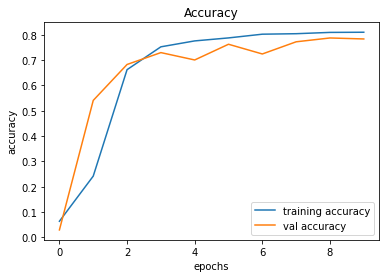

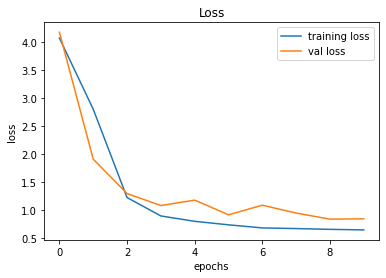

In [42]:
# Display Accuracy and Loss values of Training and Validation data

import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [43]:
model.save("CNN_version1.h5")

## Training with Greyscale Augmented Images

In [159]:
# Import Training And Validation Sets

train_x = pickle_To_Image('./Pickled Files/train_split_x.pkl')
train_y = pickle_To_Image('./Pickled Files/train_split_y.pkl')

val_x = pickle_To_Image('./Pickled Files/val_split_x.pkl')
val_y = pickle_To_Image('./Pickled Files/val_split_y.pkl')

dataset has been imported :)
dataset has been imported :)
dataset has been imported :)
dataset has been imported :)


### Greyscale and Normalise Training and Validation set

Min and Max value of image:  0.0 1.0


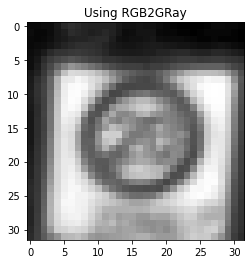

In [161]:
train_x_processed_rgb2gray = np.array([setGrayAndNormalise(img) for img in train_x])
val_x_processed_rgb2gray = np.array([setGrayAndNormalise(img) for img in val_x])

plt.imshow(train_x_processed_rgb2gray[0], cmap='gray')
plt.imshow(val_x_processed_rgb2gray[0], cmap='gray')

plt.title('Using RGB2GRay')
print("Min and Max value of image: ", train_x_processed_rgb2gray.min(), train_x_processed_rgb2gray.max())

In [162]:
# reshape processed train_x and val_x to match the input shape of the model
train_x_processed_rgb2gray= np.reshape(train_x_processed_rgb2gray, (
train_x_processed_rgb2gray.shape[0], train_x_processed_rgb2gray.shape[1], train_x_processed_rgb2gray.shape[2],1))

val_x_processed_rgb2gray = np.reshape(val_x_processed_rgb2gray, (
val_x_processed_rgb2gray.shape[0], val_x_processed_rgb2gray.shape[1], val_x_processed_rgb2gray.shape[2],1))


In [163]:
train_x_processed_rgb2gray.shape
# val_x_processed_rgb2gray.shape

(36629, 32, 32, 1)

### Build Second Model Architecture

In [54]:
from Model_Factory import CNN_v2
input_shape = (32, 32, 1)
num_classes = 43

model_v2 = CNN_v2(input_shape,num_classes )
model_v2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
__________

### Build Image Generator

In [168]:
# one hot encode train and validation labels
y_train = to_categorical(train_y, 43)
y_val = to_categorical(val_y, 43)

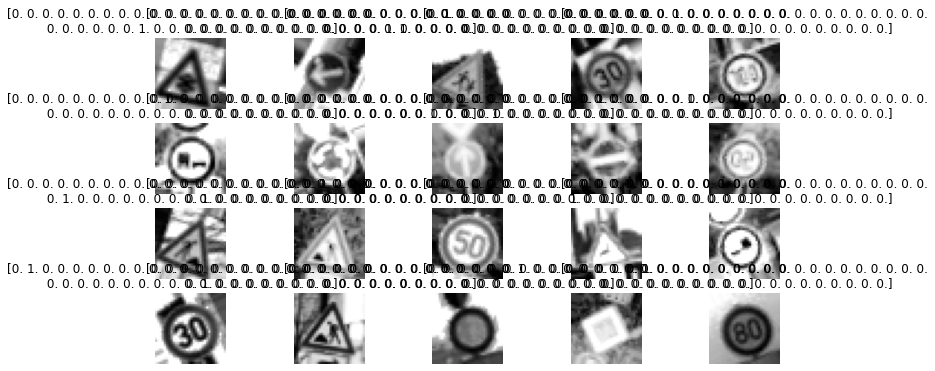

In [80]:

# Declare ImageDataGenerator Parameters
batch_size = 32
n_batches = 20
rotation_range = 30
brightness_range = [0.6, 1.4]

# Intialise  instance data generator using parameters
datagen = ImageDataGenerator(
    rotation_range=rotation_range,fill_mode='nearest',horizontal_flip=True, brightness_range=brightness_range )

# creates a generator object to generate batches of data during training 
train_x_generator = datagen.flow(train_x_processed_rgb2gray, y_train, batch_size=batch_size)

# generate samples and plot
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(12,6))
ax = ax.ravel()

# generate sample batch of images
for i in range(n_batches):

    # convert to unsigned integers
    image, label = next(train_x_generator)
    image = image.astype('uint8')

    ax[i].imshow(image[0].squeeze(), cmap='gray')
#     ax[i].set_title(image[0].shape)
    
    ax[i].set_title(label[0])
    ax[i].axis('off')
    
plt.show()

In [71]:
len(train_x_generator)

1145

In [73]:
# Declare training parameters
learning_rate = 0.001
epoch = 10
batch_size =32

# Compile model usinf Adam optimiser
model_v2.compile(loss='categorical_crossentropy',optimizer='adam',  metrics=['accuracy'])

In [74]:

# Declare tensorboard call back to view visualisations
NAME = "CNN-6x16-5-5"

# Creates a Tensorboard callback that saves log files in directory
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(NAME))

# Run the tensorboard command to view the visualizations.

In [75]:
val_x_processed_rgb2gray.shape

(2580, 32, 32, 1)

In [ ]:
# Train model with generator and tensorboard callback
history = model_v2.fit_generator(train_x_generator, 
                       steps_per_epoch=len(train_x_processed_rgb2gray)/ batch_size, 
                       epochs=10,
                       validation_data= (val_x_processed_rgb2gray, y_val), 
                       callbacks=[tensorboard_callback])


In [ ]:
plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

# Hyperparameter Tuning of Model

## Tuning using RandomizedSearchCV

In [104]:
# define a generic model to use for parameter tuning
def createModel(filters, kernel_size, dropout_rate, learning_rate, optimizer):
    
    # Create a model template for greyscale images and 43 classes
    model= Sequential()
    
    model.add(Conv2D(filters=filters, kernel_size=(kernel_size,kernel_size), activation='relu',input_shape=(32,32,1)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(rate=dropout_rate))
    
    model.add(Conv2D(filters=filters, kernel_size=(kernel_size,kernel_size), activation='relu',input_shape=(32,32,1)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(rate=dropout_rate))
    
    
    model.add(Flatten())
    model.add(Dense(43, activation='softmax'))
    
    # Compile model using the arguments
    model.compile(loss='categorical_crossentropy',optimizer=optimizer(lr=learning_rate),  metrics=['accuracy'])
    
    return model


In [99]:
# define parameter list to iterate through
param_dict={
    'filters': [16,32,64], 
    'kernel_size': [3,5,7], 
    'dropout_rate': [0.25,0.3,0.4], 
    'learning_rate': [0.1,0.01,0.001], 
    'optimizer': [Adam, SGD,Adagrad]
}

# Create a keras classifier object to user RandomizedSearchCV
clf_obj = keras.wrappers.scikit_learn.KerasClassifier(createModel)

# Create a RandomizedSearchCV object and pass in param_dict and clf_obj
random_search = RandomizedSearchCV(clf_obj, param_distributions=param_dict, cv=5, verbose=2)

# Fit the model
history = random_search.fit(train_x_processed_rgb2gray, y_train, epochs=epoch, batch_size=batch_size)

# Display best parameters and accuracies
print("Best Params: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Epoch 1/10
29303/29303 [==============================] - 8s 275us/step - loss: 3.5752 - acc: 0.0577
Epoch 2/10
29303/29303 [==============================] - 4s 146us/step - loss: 3.3853 - acc: 0.0844
Epoch 3/10
29303/29303 [==============================] - 4s 151us/step - loss: 3.3524 - acc: 0.0928
Epoch 4/10
29303/29303 [==============================] - 4s 152us/step - loss: 3.3176 - acc: 0.1133
Epoch 5/10
29303/29303 [==============================] - 4s 149us/step - loss: 3.2770 - acc: 0.1305
Epoch 6/10
29303/29303 [==============================] - 4s 144us/step - loss: 3.2315 - acc: 0.1489
Epoch 7/10
29303/29303 [==============================] - 4s 150us/step - loss: 3.1727 - acc: 0.1692
Epoch 8/10
29303/29303 [==============================] - 5s 154us/step - loss: 3.0948 - acc: 0.1938
Epoch 9/10
29303/29303 [==============================] - 4s 151us/step - loss: 3.0023 - acc: 0.2223
Epoch 10/10
7326/7326 [=======

29303/29303 [==============================] - ETA: 0s - loss: 14.9102 - acc: 0.07 - 8s 279us/step - loss: 14.9135 - acc: 0.0747
Epoch 7/10
29303/29303 [==============================] - 8s 262us/step - loss: 14.9135 - acc: 0.0747
Epoch 8/10
29303/29303 [==============================] - 8s 287us/step - loss: 14.9135 - acc: 0.0747
Epoch 9/10
29303/29303 [==============================] - 8s 283us/step - loss: 14.9135 - acc: 0.0747
Epoch 10/10
7326/7326 [==============================] - 4s 479us/step
[CV] END dropout_rate=0.25, filters=32, kernel_size=3, learning_rate=0.1, optimizer=<class 'keras.optimizers.Adagrad'>; total time= 1.7min
Epoch 1/10
29304/29304 [==============================] - 14s 462us/step - loss: 11.2734 - acc: 0.1362
Epoch 2/10
29304/29304 [==============================] - 10s 331us/step - loss: 1.2371 - acc: 0.6035
Epoch 3/10
29304/29304 [==============================] - 8s 279us/step - loss: 0.9784 - acc: 0.6835
Epoch 4/10
29304/29304 [=========================

7326/7326 [==============================] - 3s 357us/step
[CV] END dropout_rate=0.3, filters=64, kernel_size=7, learning_rate=0.001, optimizer=<class 'keras.optimizers.Adam'>; total time= 1.2min
Epoch 1/10
29303/29303 [==============================] - 11s 385us/step - loss: 1.1478 - acc: 0.6717
Epoch 2/10
29303/29303 [==============================] - 7s 228us/step - loss: 0.3107 - acc: 0.9054
Epoch 3/10
29303/29303 [==============================] - 7s 243us/step - loss: 0.2055 - acc: 0.9386
Epoch 4/10
29303/29303 [==============================] - 7s 236us/step - loss: 0.1576 - acc: 0.9512
Epoch 5/10
29303/29303 [==============================] - 7s 242us/step - loss: 0.1252 - acc: 0.9618
Epoch 6/10
29303/29303 [==============================] - 7s 244us/step - loss: 0.1171 - acc: 0.9643
Epoch 7/10
29303/29303 [==============================] - 7s 247us/step - loss: 0.1042 - acc: 0.9667
Epoch 8/10
29303/29303 [==============================] - 7s 222us/step - loss: 0.1001 - acc: 0.

29303/29303 [==============================] - 6s 203us/step - loss: 3.2028 - acc: 0.1458
Epoch 6/10
29303/29303 [==============================] - 5s 184us/step - loss: 3.1620 - acc: 0.1645
Epoch 7/10
29303/29303 [==============================] - 6s 195us/step - loss: 3.1149 - acc: 0.1783
Epoch 8/10
29303/29303 [==============================] - 6s 199us/step - loss: 3.0670 - acc: 0.1992
Epoch 9/10
29303/29303 [==============================] - 5s 173us/step - loss: 3.0197 - acc: 0.2146
Epoch 10/10
7326/7326 [==============================] - 3s 405us/step
[CV] END dropout_rate=0.4, filters=16, kernel_size=3, learning_rate=0.001, optimizer=<class 'keras.optimizers.Adagrad'>; total time= 1.1min
Epoch 1/10
29303/29303 [==============================] - 10s 325us/step - loss: 3.3384 - acc: 0.0793
Epoch 2/10
29303/29303 [==============================] - 5s 187us/step - loss: 3.2588 - acc: 0.1008
Epoch 3/10
29303/29303 [==============================] - 5s 166us/step - loss: 3.2096 - acc

In [ ]:
## Best Accuracy = 0.9714

"""
Best Params:    {'optimizer': <class 'keras.optimizers.Adam'>, 
     'learning_rate': 0.001, 
     'kernel_size': 5, 
     'filters': 16, 
     'dropout_rate': 0.3} 
"""
## Best Score = 0.12710972839363907

## Train model using tuned parameters

In [166]:
# define function for custom model
def build_model(input_shape, filtersCov1,filtersCov2, kernel_sizeCov1, kernel_sizeCov2, dropout_rate, learning_rate, optimizer):
    
    # Create a model template from greyscale images and 43 classes
    model= Sequential()
    
    model.add(Conv2D(filters=filtersCov1, kernel_size=(kernel_sizeCov1,kernel_sizeCov1), activation='relu',input_shape=input_shape))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(rate=dropout_rate))
    
    model.add(Conv2D(filters=filtersCov2, kernel_size=(kernel_sizeCov2,kernel_sizeCov2), activation='relu',input_shape=input_shape))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(rate=dropout_rate))
    
    
    model.add(Flatten())
    model.add(Dense(43, activation='softmax'))
    
    # Compile model using the arguments
    model.compile(loss='categorical_crossentropy',optimizer=optimizer(lr=learning_rate),  metrics=['accuracy'])
    
    return model

# Declare tuned parameters to create a new model
input_shape = (32,32,1)
filtersCov1 = 6
filtersCov2 = 16 
kernel_sizeCov1 = 3
kernel_sizeCov2 = 5
dropout_rate = 0.3
learning_rate = 0.001
optimizer = Adam

# Create instance of a model using tuned parameters
model_tuned = build_model(input_shape,filtersCov1, filtersCov2, kernel_sizeCov1, kernel_sizeCov2, dropout_rate, learning_rate, optimizer)
model_tuned.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 6)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
__________

In [119]:

# Declare tensorboard call back to view visualisations
NAME = "CNNv3-aug-tuned"

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(NAME))

# Run the tensorboard command to view the visualizations.

In [120]:
# Train Tuned Model
history = model_tuned.fit(train_x_processed_rgb2gray, 
                          y_train, 
                          batch_size= batch_size, 
                          epochs=10,
                          validation_data= (val_x_processed_rgb2gray, y_val),
                          callbacks=[tensorboard_callback])

Train on 36629 samples, validate on 2580 samples
Epoch 1/10
36629/36629 [==============================] - 28s 773us/step - loss: 1.8638 - acc: 0.4842 - val_loss: 1.0879 - val_acc: 0.6853
Epoch 2/10
36629/36629 [==============================] - 10s 262us/step - loss: 0.7230 - acc: 0.7768 - val_loss: 0.6718 - val_acc: 0.8287
Epoch 3/10
36629/36629 [==============================] - 10s 272us/step - loss: 0.5283 - acc: 0.8370 - val_loss: 0.5157 - val_acc: 0.8609
Epoch 4/10
36629/36629 [==============================] - 10s 283us/step - loss: 0.4379 - acc: 0.8610 - val_loss: 0.4635 - val_acc: 0.8705
Epoch 5/10
36629/36629 [==============================] - 9s 258us/step - loss: 0.3763 - acc: 0.8806 - val_loss: 0.4041 - val_acc: 0.8934
Epoch 6/10
36629/36629 [==============================] - 10s 260us/step - loss: 0.3351 - acc: 0.8925 - val_loss: 0.3843 - val_acc: 0.8977
Epoch 7/10
36629/36629 [==============================] - 10s 266us/step - loss: 0.3128 - acc: 0.8979 - val_loss: 0.37

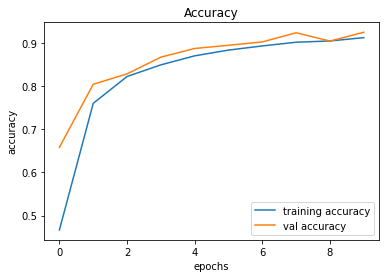

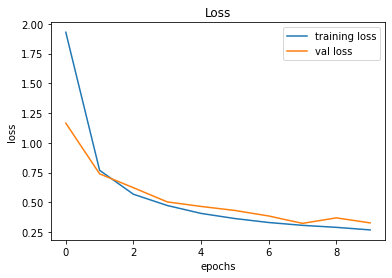

In [114]:
# Display Accuracy and Loss values of Training and Validation data
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [117]:
# Save model
model_tuned.save("CNN_version3_grey_tuned.h5")

## Train model using Transfer Learning

# Testing

## Import Test Data

In [2]:
from PIL import Image
import os
import numpy as np

# Declare training path
test_path = './gtsrb-dataset/Test'
test_id_path = './gtsrb-dataset/Test.csv'

# Declare arrays to store test images and labels
IMG_DATA_TEST = []
test_y =[]

# Read in true lables form csv file
test = pd.read_csv(test_id_path)
test_y = test["ClassId"].values

# Load images, resize and store in an array
for img in os.listdir(test_path):
    im = Image.open(test_path +'/'+ img)
    im = im.resize((32,32))
    im = np.array(im)
    IMG_DATA_TEST.append(im)
IMG_DATA_ARR_TEST = np.array(IMG_DATA_TEST)

In [3]:
len(IMG_DATA_ARR_TEST)

12630

In [4]:
print(test_y[0])

16


In [10]:
with open('test_x','wb') as f:
    pickle.dump(IMG_DATA_ARR_TEST, f)

In [11]:
with open('test_y','wb') as f:
    pickle.dump(test_y, f)

## Import Saved Model

In [7]:
# Import saved model for testing
model = keras.models.load_model('CNN_version1.h5')
model_tuned = keras.models.load_model('CNN_version3_grey_tuned.h5')


## Test model on Test dataset

In [88]:
from sklearn.metrics import accuracy_score

# Predict classes for test data
pred = model.predict_classes(IMG_DATA_ARR_TEST)

# Dsiplay accuracy with the test data
print('Test Data accuracy: ',accuracy_score(test_y, pred)*100)

Test Data accuracy:  81.85273159144893


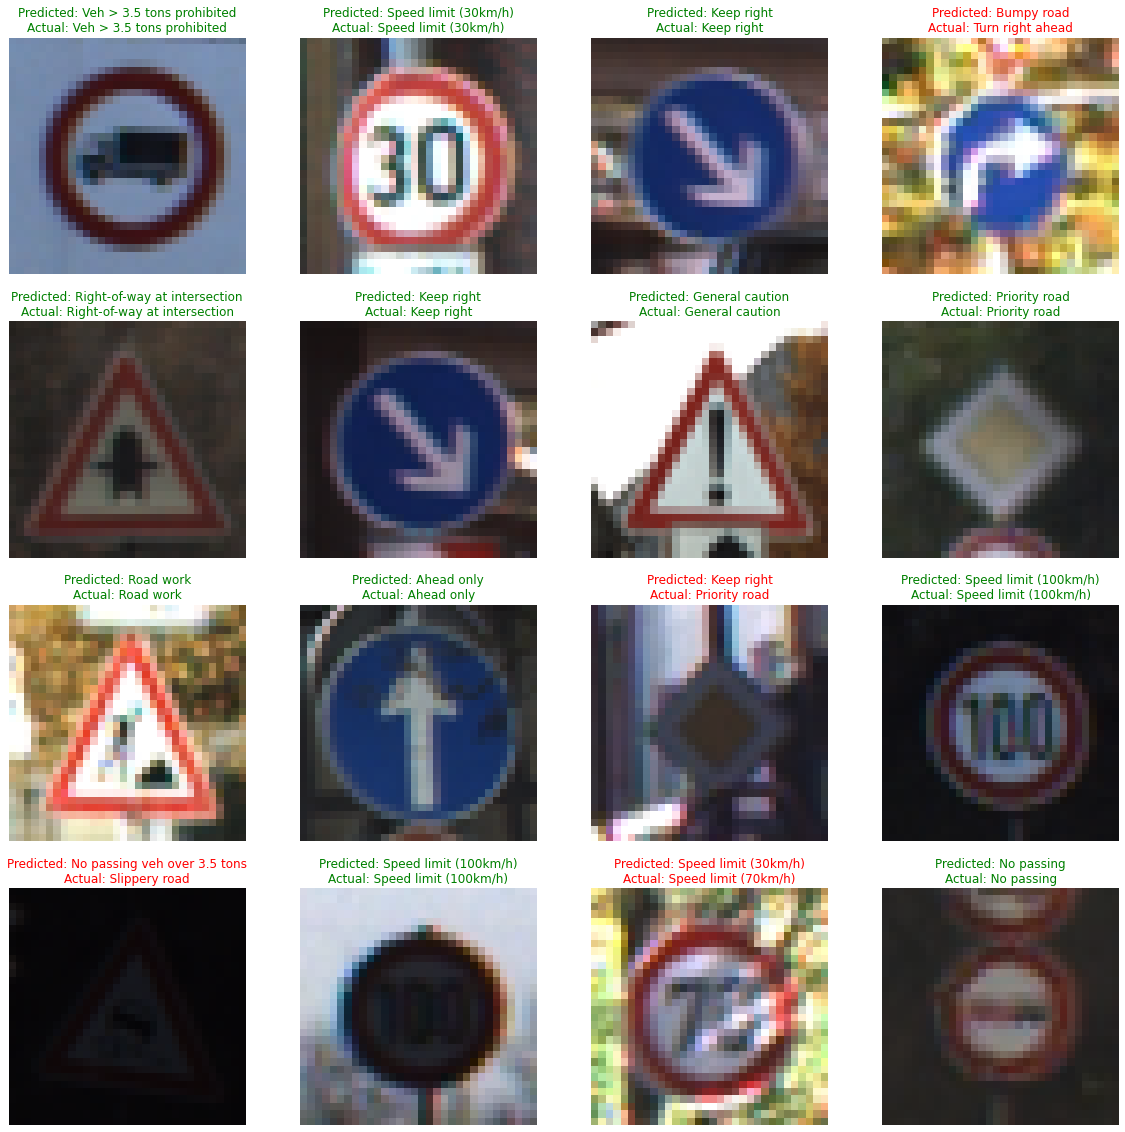

In [33]:
# Plot graphs of sample images that were correctly and incorrectly classified
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(IMG_DATA_ARR_TEST[i], cmap='binary')
    if test_y[i] == pred[i]:
        ax.set_title('Predicted: '+CLASS_LABELS[pred[i]]+ '\nActual: '+CLASS_LABELS[test_y[i]], color='green')
    else:
        ax.set_title('Predicted: '+CLASS_LABELS[pred[i]]+ '\nActual: '+CLASS_LABELS[test_y[i]], color='red')   
    ax.axis('off')
plt.show()

## code for plotting predicted images and labels were taken from https://github.com/tk2093/CNN/blob/main/GTSRB_Keras_Classifier/gtsrb-prediction-cnn.ipynb

## Test model on a single image

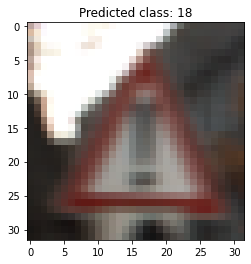

In [84]:
from tensorflow.keras.preprocessing import image

# function to predict single image
def classifyImage(path):
    # read in image
    im = Image.open(path)
    # resize image
    im = im.resize((32,32))
    ## REQUIRES NORMALIZATION
    img_arr = np.array(im)
    plt.imshow(img_arr)
    # reshape array to match the input shape of the model
    img_arr = np.expand_dims(img_arr, axis=0)
    predicted = model.predict_classes(img_arr)[0]
    # display image
    plt.title(f"Predicted class: {predicted}")
    
    
# Declare test path    
test_image_path =r"C:\Users\Fairooz\OneDrive - Office 365\Year 3 Semester 1\Double Project\Dataset\00331.png"

# Call classify image and plot prediction
classifyImage(test_image_path)


## Testing Tuned Model on Grayscale images

In [50]:
from sklearn.metrics import accuracy_score
import cv2

# Convert to Grayscale and Normalise
def setGrayAndNormalise(img):
  img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  equ  = cv2.equalizeHist(img_gray)
  norm = equ/255  
  return norm

# Call function on each image in the testing set 
IMG_DATA_ARR_TEST = np.array([setGrayAndNormalise(img) for img in IMG_DATA_ARR_TEST])

In [51]:
IMG_DATA_ARR_TEST.shape

(12630, 32, 32)

In [179]:
# Reshape test data to match input shape of model
IMG_DATA_ARR_TEST= np.reshape(IMG_DATA_ARR_TEST, (
IMG_DATA_ARR_TEST.shape[0], IMG_DATA_ARR_TEST.shape[1], IMG_DATA_ARR_TEST.shape[2],1))


# Predict classes
pred_tuned = model_tuned.predict_classes(IMG_DATA_ARR_TEST)
# Predict Probabilties
pred_proba = model_tuned.predict(IMG_DATA_ARR_TEST)

# Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(test_y, pred_tuned)*100)

Test Data accuracy:  91.93190815518606


In [174]:
IMG_DATA_ARR_TEST.shape

(12630, 32, 32, 1)

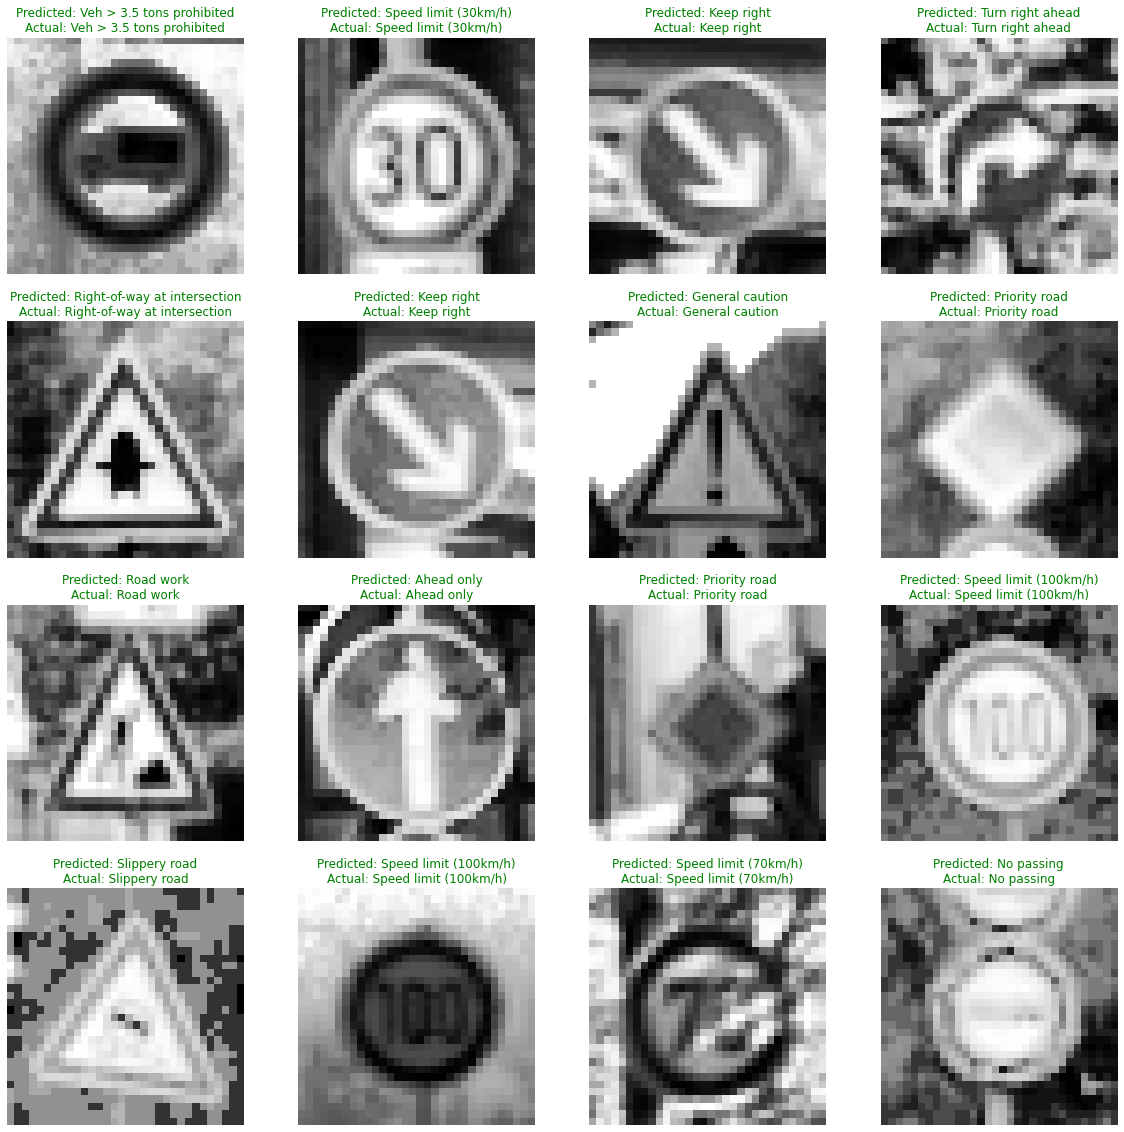

In [63]:
# Plot graphs of sample images that were correctly and incorrectly classified
# Note that this version of the model performed significantly better with fewer errors

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(IMG_DATA_ARR_TEST[i].squeeze(), cmap='gray')
    if test_y[i] == pred[i]:
        ax.set_title('Predicted: '+CLASS_LABELS[pred_tuned[i]]+ '\nActual: '+CLASS_LABELS[test_y[i]], color='green')
    else:
        ax.set_title('Predicted: '+CLASS_LABELS[pred_tuned[i]]+ '\nActual: '+CLASS_LABELS[test_y[i]], color='red')   
    ax.axis('off')
plt.show()


### Classification Metrics using scikit-learn metrics API

In [181]:
# Reduce array to 1D
# y_classes = pred_tuned[:, 0]
y_probs = pred_proba[:, 0]

[18 25 11 26 28]
Top 5 predictions:
1. General caution with a probability of 96.70%
2. Road work with a probability of 1.72%
3. Right-of-way at intersection with a probability of 1.53%
4. Traffic signals with a probability of 0.02%
5. Children crossing with a probability of 0.01%


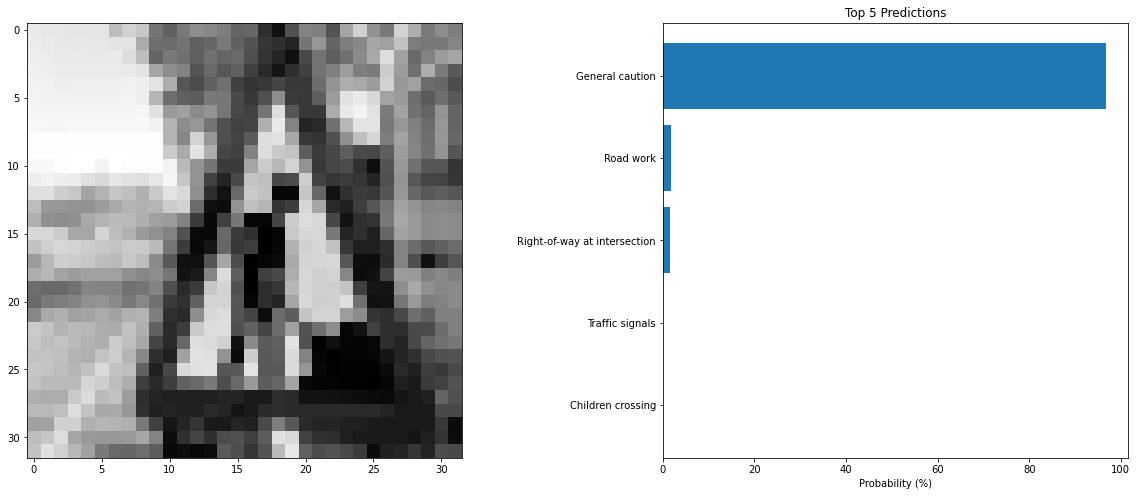

In [157]:
from tensorflow.keras.preprocessing import image

# function to predict single image
def classifyImage(path):
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))

    # Display the image on the left subplot

    # read in image
    im = Image.open(path)
    # resize image
    im = im.resize((32,32))
    ## REQUIRES NORMALIZATION
    img_arr = np.array(im)
    img_gray = cv2.cvtColor(img_arr,cv2.COLOR_RGB2GRAY)
    img_equ  = cv2.equalizeHist(img_gray)
    img_norm = img_equ/255 
    ax1.imshow(img_norm, cmap='gray')
    # reshape array to match the input shape of the model
    img_norm = np.expand_dims(img_norm, axis=0)
    img_norm = np.reshape(img_norm, (
    img_norm.shape[0], img_norm.shape[1], img_norm.shape[2],1))
    predicted = model_tuned.predict(img_norm)[0]
    # display top predicted classes
    plt.title(f"Predicted class: {predicted}")
    # Get the top 5 predicted classes
    top_5_indices = np.argsort(predicted)[-5:][::-1] 
    # Get the corresponding class labels
    top_5_labels = [CLASS_LABELS[i] for i in top_5_indices]
    # get the probabilities of top 5 predictions in percentage
    top_5_probs = predicted[top_5_indices]* 100 

    # Plot a bar graph to disply percentages
    ax2.barh(top_5_labels, top_5_probs)
    ax2.set_title('Top 5 Predictions')
    ax2.set_xlabel('Probability (%)')
    ax2.invert_yaxis()
    fig.subplots_adjust(wspace=0.4)

    # Display the top 5 predictions
    print("Top 5 predictions:")
    for i in range(len(top_5_labels)):
        print(f"{i+1}. {top_5_labels[i]} with a probability of {top_5_probs[i]:.2f}%")
 
    
test_image_path =r"C:\Users\Fairooz\OneDrive - Office 365\Year 3 Semester 1\Double Project\Dataset\road-traffic-number-sign-construction-red-660445-pxhere.com_.jpg"
classifyImage(test_image_path)




# Visualise a CNN Model

## Visualising Neural Network Design

In [ ]:
!pip install visualkeras
import visualkeras
from PIL import ImageFont


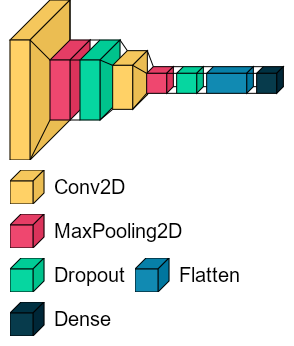

In [201]:
font = ImageFont.truetype("arial.ttf", 20)
visualkeras.layered_view(model_tuned, to_file='CNN_tuned.png',legend=True, font=font)

## Visualising Filters

### Visualising Convolutional Filters

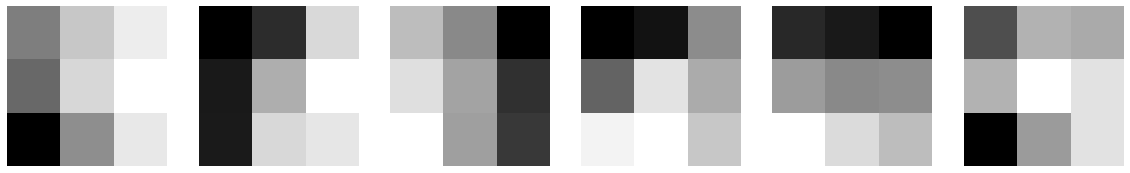

In [288]:
top_layer = model_tuned.layers[0]

# Get the weights (i.e., filters) of the convolutional layer
filters, biases = top_layer.get_weights()

# Rescale the filter values to between 0 and 1 for display purposes
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Plot each filter as a grayscale image
n_filters = filters.shape[3]
fig, ax = plt.subplots( 1, n_filters,figsize=(20, 10*n_filters))
for i in range(n_filters):
    ax[i].imshow(filters[:, :, 0, i], cmap='gray')
    ax[i].axis('off')
plt.show()


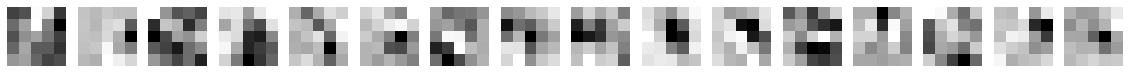

In [307]:
mid_layer = model_tuned.layers[3]

# Get the weights (i.e., filters) of the convolutional layer
filters, biases = mid_layer.get_weights()

# Rescale the filter values to between 0 and 1 for display purposes
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Plot each filter as a grayscale image
n_filters = filters.shape[3]
fig, ax = plt.subplots( 1, n_filters,figsize=(20, 10*n_filters))
for i in range(n_filters):
    ax[i].imshow(filters[:, :, 0, i], cmap='gray')
    ax[i].axis('off')
plt.show()

